In [50]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2 # https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%config IPCompleter.greedy=True  #enables autocomplete with tap of tab key after a period

## Assignment 1

#### Team 3

 - Scott Brewer (sbrewe5@uic.edu)
 - Rahul Shukla (rshukl4@uic.edu


### 1 Backpropagation

#### Text answer

Boxes on the left are for a,b,c,d and the lower box input into multiply_e node is e.


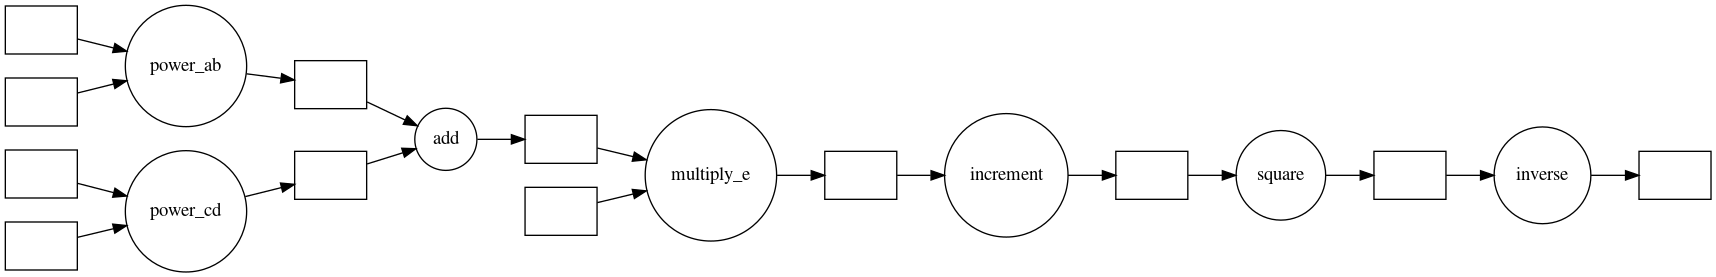

In [1085]:
import dask

def inp(x):
    return(x)
        
def power(x,y):
    return x**y

def square(x):
    return x*x

def multiply(x,y):
    return x * y

def add(x, y):
    return x + y

def inverse(x):
    return 1 / x

def increment(x):
    return x + 1

dsk = {
    'a': 1,
    'b': 1,
    'c': 1,
    'd': 1,
    'e': 1,
    'power_ab': (power,'a','b'),
    'power_cd': (power,'c','d'),
    'add': (add,'power_ab','power_cd'),
    'multiply_e': (multiply,'e','add'),
    'increment': (increment,'multiply_e'),
    'square' : (square, 'increment'),
    'inverse': (inverse,'square')}

print('Boxes on the left are for a,b,c,d and the lower box input into multiply_e node is e.')
dask.visualize(dsk,rankdir="LR")

In [1079]:
import math

# Set inputs
a = 1
b = 1
c = 1
d = 1
e = 1

# Calculate parts of the function
pow_ab = power(a,b)
pow_cd = power(c,d)
add_pow = add(pow_ab,pow_cd)
mult_e = multiply(add_pow,e)
inc = increment(mult_e)
sq = square(inc)
inv = inverse(sq)

# Evaluate function with given inputs
f = inv
print('f =',f)

# Calculate gradients of each node wrt to inputs
df_dsq = -1/sq**2
dsq_dinc = 2*inc
dinc_dmult = 1
dmult_de = add_pow
dmult_dadd = e
dadd_dpow_ab = 1
dadd_dpow_cd = 1
dpow_ab_da = b*a**(b-1)
dpow_ab_db = (a**b)*math.log(b)
dpow_cd_dc = d*c**(d-1)
dpow_cd_dd = (c**d)*math.log(d)

print('df_dsq =',df_dsq)
print('dsq_dinc =',dsq_dinc)
print('dinc_dmult =',dinc_dmult)
print('dmult_de =',dmult_de)
print('dmult_dadd =',dmult_dadd)
print('dadd_dpow_ab =',dadd_dpow_ab)
print('dadd_dpow_cd =',dadd_dpow_cd)
print('dpow_ab_da =',dpow_ab_da)
print('dpow_ab_db =',dpow_ab_db)
print('dpow_cd_dc =',dpow_cd_dc)
print('dpow_cd_dd =',dpow_cd_dd)

# Multiply node gradients together to get the final gradient of the function wrt to each input
df_da = df_dsq * dsq_dinc * dinc_dmult * dmult_dadd * dadd_dpow_ab * dpow_ab_da
df_db = df_dsq * dsq_dinc * dinc_dmult * dmult_dadd * dadd_dpow_ab * dpow_ab_db
df_dc = df_dsq * dsq_dinc * dinc_dmult * dmult_dadd * dadd_dpow_cd * dpow_cd_dc
df_dd = df_dsq * dsq_dinc * dinc_dmult * dmult_dadd * dadd_dpow_cd * dpow_cd_dd
df_de = df_dsq * dsq_dinc * dinc_dmult * dmult_de

f = 0.1111111111111111
df_dsq = -0.012345679012345678
dsq_dinc = 6
dinc_dmult = 1
dmult_de = 2
dmult_dadd = 1
dadd_dpow_ab = 1
dadd_dpow_cd = 1
dpow_ab_da = 1
dpow_ab_db = 0.0
dpow_cd_dc = 1
dpow_cd_dd = 0.0


In [1080]:
print('Answer to gradients of f(a,b,c,d,e) w.r.t. it\'s inputs:')
print('df_da =',df_da)
print('df_db =',df_db)
print('df_dc =',df_dc)
print('df_dd =',df_dd)
print('df_de =',df_de)

Answer to gradients of f(a,b,c,d,e) w.r.t. it's inputs:
df_da = -0.07407407407407407
df_db = -0.0
df_dc = -0.07407407407407407
df_dd = -0.0
df_de = -0.14814814814814814


### 2. Gradient descent

#### 2.1 Write a function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays.

Mean squared error is the sum of the element-wise differences squared and then divided by number of elements.

MSE = (1/N)*Sum((Y-Yhat)^2)

In [1087]:
# function to compute the mean squared error between a prediction and ground truth assuming both are numpy arrays.
import numpy as np

# Test data
y=np.array([1,2,3])
y_hat=np.array([3,4,5])

def mse(y, y_hat):
    '''Computes mean square error'''
    n = len(y)
    squares = np.square(y-y_hat)
    sum_squares = np.sum(squares)
    return sum_squares/n

mse(y,y_hat)

4.0

#### 2.2 Consider a model: y = mx + c, where the model parameter m = 1 and parameter c = 0 and x ∈ (0, 1). Plot the function using matplotlib.

Answer: Function plotted with matplotlib:


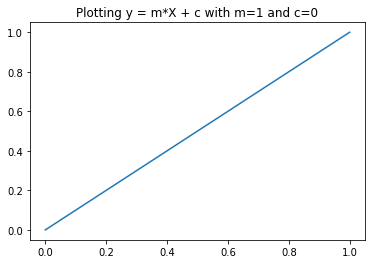

In [1088]:
import matplotlib.pyplot as plt

X = np.array([0,1])
m = 1
c = 0
y = m * X + c

plt.title('Plotting y = m*X + c with m=1 and c=0')
print('Answer: Function plotted with matplotlib:')
plt.plot(X,y)

#### 2.3 Generate example data by drawing N = 100 uniform values from the range in which x lies, and compute the corresponding y.

In [1090]:
X = np.arange(0,1.,.01)
y = m * X + c
print(X.shape)
print(y.shape)

(100,)
(100,)


#### 2.4 Assuming that you do not know the model parameters, use backpropagation and gradient descent updates to find the model parameters (choose an appropriate learning rate). The loss function will be the mean squared error.

Using MSE loss and a linear prediction function, we have the following equations:  
MSE = (1/N)*sum((error)^2)  
error = y-pred  
pred = m*X+c  

With the following gradients:  
dMSE/dpred = 2/N*sum(error)  
derror/dpred = -1  
dpred/dm = X  
dpred/dc = 1  

Using the chain rule, these combine to get gradients to update m and c:  
dMSE/dm = -2/N*sum[X*(y-pred)]  
dMSE/dc = -2/N*sum[1*(y-pred)]

In [1091]:
#Initial value for the Gradient Descent Parameter
step_size = .5 #Also called learning rate

# Given small data set, using batch size equal to number of examples
N = X.shape[0]

In [1093]:
# Start by initializing parameters randomly
m = np.random.randn()
c = np.random.randn()

# gradient descent loop
for i in range(200):
  
    # evaluate class scores, [N x K]
    pred = np.dot(X, m) + c
    #print('pred',pred)
  
    # compute the loss: mean squared error loss
    loss = mse(y,pred)
    
    if i % 10 == 0:
        print("iteration: "+str(i) +" loss: "+str(loss)+ '\t m: '+str(m)+' c: '+str(c))

    dm = -(2/N)*np.dot(y-pred,X)
    dc = -(2/N)*np.sum(y-pred)

  
    # perform a parameter update.
    # Note that the gradient is positive, so we must subtract it from the parameter to descend toward a minima.
    m += -step_size * dm
    c += -step_size * dc
    
print('Answer:')
print('Final m =',m,'\tFinal c =',c,'\tFinal MSE =',loss)

iteration: 0 loss: 2.3815822403884552	 m: -1.2734225612603847 c: -0.27140961588400725
iteration: 10 loss: 0.059640002742610394	 m: 0.16012333726756683 c: 0.4451183109762345
iteration: 20 loss: 0.015219424204487204	 m: 0.5757270830641634 c: 0.2248575531342293
iteration: 30 loss: 0.0038838172784074866	 m: 0.7856736373554551 c: 0.11358938917247574
iteration: 40 loss: 0.0009911042920801977	 m: 0.891730563297903 c: 0.05738099144357519
iteration: 50 loss: 0.0002529181079761221	 m: 0.9453064439710084 c: 0.028986670348655125
iteration: 60 loss: 6.454171357482633e-05	 m: 0.9723709186801514 c: 0.014642951206721995
iteration: 70 loss: 1.6470282908997166e-05	 m: 0.9860428505659026 c: 0.00739705586959177
iteration: 80 loss: 4.2030216441013775e-06	 m: 0.992949384814117 c: 0.0037367081789321205
iteration: 90 loss: 1.0725614756219918e-06	 m: 0.9964383003324475 c: 0.0018876412806205847
iteration: 100 loss: 2.737050190076623e-07	 m: 0.9982007662895511 c: 0.0009535637876118942
iteration: 110 loss: 6.9846

#### The following functions were used in lieu of re-copying everything for each of the three functions

In [1095]:
def mse(y, y_hat):
    N = len(y)
    squares = np.square(y-y_hat)
    sum_squares = np.sum(squares)
    return sum_squares/N

def func1(X, m, c):
    '''Returns result of linear function f(m,x,c)=m*x+c and the result of the function's partial
    derivatives w.r.t. m and c'''
    dm = X.T  #partial derivative of func1 w.r.t. m = X
    dc = np.ones(len(X)) #partial derivative of func1 w.r.t. c = 1
    result = np.multiply(X,m) + c
    return result, dm ,dc

def func2(X, m, c):
    '''Returns result of polynomial function f(m,x,c)=m1*x+m2*x^2+c and the result of the function's partial
    derivatives w.r.t. m1, m2, and c'''
    dm = []
    dm.append(X.T) #partial derivative of func2 w.r.t. m1 = X
    dm.append((np.square(X)).T) #partial derivative of func2 w.r.t. m2 = X^2
    dc = np.ones(len(X)) #partial derivative of func2 w.r.t. c = 1
    result = np.dot(X,m[0]) + np.dot(np.square(X),m[1]) + c
    return result, dm, dc

def func3(X, m ,c):
    '''Returns result of hyperbolic function f(m,x,c)=tanh(m*x+c) and the result of the function's partial
    derivatives w.r.t. m and c'''
    inner = np.add(np.multiply(X,m),c) #inner function
    
    dtanh = 1 - np.square(np.tanh(inner)) #derivative of tanh=1-(tanh(u))^2
    dm = np.multiply(X.T,dtanh) #derivative of tanh(mx+c)=X(1-(tanh(mx+c))^2) w.r.t. m, using chain rule
    dc = dtanh #derivative of tanh(mx+c)=1-(tanh(mx+c))^2 w.r.t. c, using chain rule
    
    #dm_part = np.multiply(X, 1-np.square(np.tanh(inner)))
    #dc_part = 1-np.square(np.tanh(inner))
    
    result = np.tanh(inner)
    return result, dm, dc

def gradient_descent_step(func, X, y, m, c, step_size):
    '''Completes one step of gradient descent using given function and assuming MSE as loss function.'''
    reg = 1e-3
    pred, dm_part, dc_part = func(X,m,c)
    loss = mse(y,pred)

    if len(m) == 1:
        dm_p = -(2/N)*np.dot(y-pred,dm_part) #Assumes MSE as loss function
        #dm_p += reg * m # regularization gradient
        m += -step_size * dm_p
    else:
        for i in range(len(m)):
            dm_p = -(2/N)*np.dot(y-pred,dm_part[i]) #Assumes MSE as loss function
            #dm_p += reg * m[i] # regularization gradient
            m[i] += -step_size * dm_p

    dc = -(2/N)*np.dot(y-pred,dc_part) #Assumes MSE as loss function
    c += -step_size * dc
    return loss, m, c

def gradient_descent(func, X, y, m_dim, step_size=.1, steps=100):
    '''Performs gradient descent over given number of steps with given step_size (aka learning rate)'''
    np.random.seed(7)
    m = np.random.randn(m_dim)
    c = np.random.randn()
    #print('m_init',m,'c_init',c)
    losses =[]
    for i in range(steps):
        loss, m, c = gradient_descent_step(func, X, y, m, c, step_size)
        losses.append(loss)
        #if i % 10 == 0: print("iteration: "+str(i) +" loss: "+str(loss)+ '\t m: '+str(m)+' c: '+str(c))
    return losses, m, c

#### 2.5 Plot the error in the estimates as a function of the number of iterations of gradient update. Change the learning rate and plot another curve on the previous plot.

In [1105]:
X = np.arange(0,1.,.01)
m = 1
c = 0
y = func1(X,m,c)[0]

steps = 200
step_sizes = [.01,.1,.5]
colors = ['r','g','b']
losses=[]
ms = []
cs = []
for step_size in step_sizes:
    loss, m, c = gradient_descent(func1, X, y, 1, step_size=step_size, steps=steps)
    ms.append(m)
    cs.append(c)
    losses.append(loss)
    print('step_size', step_size, '\tm:',m,'\tc:',c)

print()
print('Answer:')
print('Using LR = .5:')
print('Final m =',ms[2],'\tFinal c =',cs[2],'\tFinal MSE =',losses[-1][-1])

step_size 0.01 	m: [1.56170676] 	c: -0.2982960905528034
step_size 0.1 	m: [1.05130128] 	c: -0.027188820734824325
step_size 0.5 	m: [1.00000086] 	c: -4.542694803936781e-07

Answer:
Using LR = .5:
Final m = [1.00000086] 	Final c = -4.542694803936781e-07 	Final MSE = 7.120726821933053e-14


Answer to plotting ground truth and final functions at various learning rates:


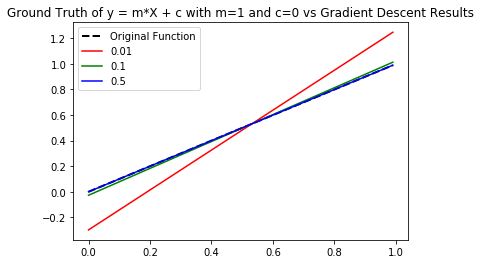

Answer to plotting progression of loss during gradient descent:


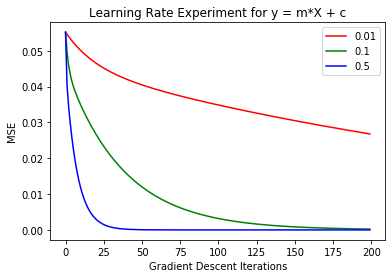

In [1108]:
print('Answer to plotting ground truth and final functions at various learning rates:')
plt.title('Ground Truth of y = m*X + c with m=1 and c=0 vs Gradient Descent Results')
plt.plot(X, y, 'k', linewidth=2, linestyle='dashed', label='Original Function')
for m, c, step_size, color in zip(ms, cs, step_sizes, colors):
    plt.plot(X, func1(X,m,c)[0], color, label=step_size)
plt.legend()
plt.show()

plt.title('Learning Rate Experiment for y = m*X + c')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
for loss, step_size, color in zip(losses, step_sizes,colors):
    plt.plot(range(steps), loss, color, label=step_size)
plt.legend()

print('Answer to plotting progression of loss during gradient descent:')

With a simple linear function, gradient descent works exactly as expected, with higher learning rate converging faster toward the ground truth of the parameters.

#### 2.6 Do steps 3-5 when the model is y = m1x + m2x2 + c and the true parameters are m1 = 0.5, m2 = 1 and c = 1. And x ∈ (0,1). Also, plot the ground truth function. Compare and contrast the plot with the previous one.

In [1109]:
X = np.arange(0,1.,.01)
m = [.5, 1.]
c = 1
y = func2(X,m,c)[0]

steps = 1000
step_sizes = [.01, .1,.5,.7]
colors = ['r','g','b','m']
losses = []
ms = []
cs = []
for step_size in step_sizes:
    loss, m, c = gradient_descent(func2, X, y, 2, step_size=step_size, steps=steps)
    ms.append(m)
    cs.append(c)
    losses.append(loss)
    print('step_size', step_size, '\tm1:',m[0], '\tm2:',m[1],'\tc:',c)

print()
print('Answer:')
print('Using LR = .7:')
print('Final m1 =',ms[3][0],'Final m2 =',ms[3][1],'\tFinal c =',cs[3],'\tFinal MSE =',losses[-1][-1])

step_size 0.01 	m1: 1.8438512154168272 	m2: -0.28754740601433376 	c: 0.755688282110906
step_size 0.1 	m1: 1.3181045328497336 	m2: 0.20289744123566336 	c: 0.8563769443650158
step_size 0.5 	m1: 0.5928924892315648 	m2: 0.9094922007105918 	c: 0.9836921779392529
step_size 0.7 	m1: 0.5312460096557035 	m2: 0.9695561224173507 	c: 0.9945145794908846

Answer:
Using LR = .7:
Final m1 = 0.5312460096557035 Final m2 = 0.9695561224173507 	Final c = 0.9945145794908846 	Final MSE = 5.288862216978189e-06


Answer to plotting ground truth and final functions at various learning rates:


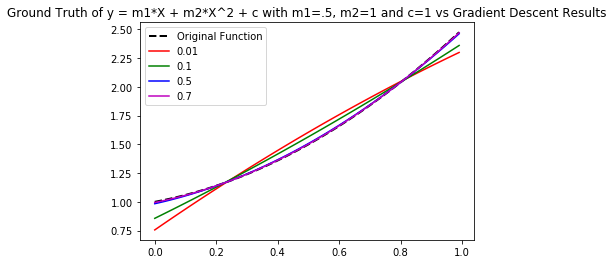

Answer to plotting progression of loss during gradient descent:


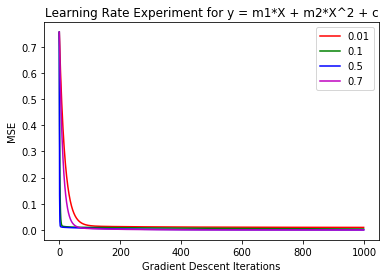

In [1110]:
print('Answer to plotting ground truth and final functions at various learning rates:')
plt.title('Ground Truth of y = m1*X + m2*X^2 + c with m1=.5, m2=1 and c=1 vs Gradient Descent Results')
plt.plot(X, y, 'k', linewidth=2, linestyle='dashed', label='Original Function')
for m, c, step_size, color in zip(ms, cs, step_sizes, colors):
    plt.plot(X, func2(X,m,c)[0], color, label=step_size)
plt.legend()
plt.show()

plt.title('Learning Rate Experiment for y = m1*X + m2*X^2 + c')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
for loss, step_size, color in zip(losses, step_sizes,colors):
    plt.plot(range(steps), loss, color, label=step_size)
plt.legend()
print('Answer to plotting progression of loss during gradient descent:')

Here we see that increasing the learning rate AND increasing the number gradient descent steps (200->1000) brings the gradient descent generated functions closer to ground truth. But this increase can only go so far - experimentation shows that increasing learning rate past ~.8 will cause the result to diverge with very high resulting MSE. The biggest difference compared to the basic linear model was the increased number of steps required to approach ground truth.

#### 2.7 Do steps 3-5 when the model is y = tanh(m ∗ x + c) and the true parameters are m = 1 and c = 2. And x ∈ (0, 2). Also, plot the ground truth function.

In [1111]:
X = np.arange(0,2,.01)
m = 1
c = 2
y = func3(X,m,c)[0]

steps = 1000
step_sizes = [.01,.1,.5,.8]
colors = ['r','g','b','m']
losses = []
ms = []
cs = []
for step_size in step_sizes:
    loss, m, c = gradient_descent(func3, X, y, 1, step_size=step_size, steps=steps)
    ms.append(m)
    cs.append(c)
    losses.append(loss)
    print('step_size', step_size, '\tm:',m ,'\tc:',c)

print()
print('Answer:')
print('Using LR = .8:')
print('Final m1 =',ms[3],'\tFinal c =',cs[3],'\tFinal MSE =',losses[-1][-1])

step_size 0.01 	m: [1.96132119] 	c: 0.9538969915229464
step_size 0.1 	m: [2.02681807] 	c: 1.522136597908006
step_size 0.5 	m: [2.06535589] 	c: 1.7770211055071117
step_size 0.8 	m: [2.09898883] 	c: 1.815251154350579

Answer:
Using LR = .8:
Final m1 = [2.09898883] 	Final c = 1.815251154350579 	Final MSE = 2.1661248949612042e-05


Answer to plotting ground truth and final functions at various learning rates:


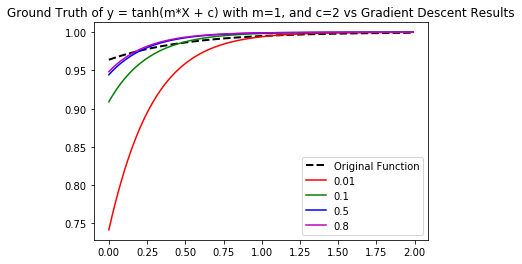

Answer to plotting progression of loss during gradient descent:


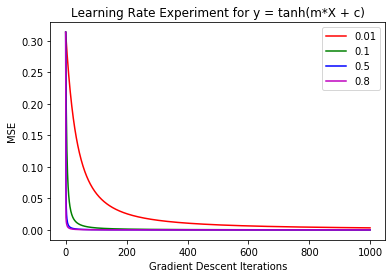

In [1112]:
print('Answer to plotting ground truth and final functions at various learning rates:')
plt.title('Ground Truth of y = tanh(m*X + c) with m=1, and c=2 vs Gradient Descent Results')
plt.plot(X, y, 'k', linewidth=2, linestyle='dashed', label='Original Function')
for m, c, step_size, color in zip(ms, cs, step_sizes, colors):
    plt.plot(X, func3(X,m,c)[0], color, label=step_size)
plt.legend()
plt.show()

print('Answer to plotting progression of loss during gradient descent:')
plt.title('Learning Rate Experiment for y = tanh(m*X + c)')
plt.xlabel('Gradient Descent Iterations')
plt.ylabel('MSE')
for loss, step_size, color in zip(losses, step_sizes,colors):
    plt.plot(range(steps), loss, color, label=step_size)
plt.legend()

Here we see the same behavior of increasing learning rate yielding results closer to the original function (also with eventual divergence). What is different is that this function is VERY sensitive to initial values for m and c. The current seed allows the MSE to minimize well, but with an m double that of ground truth. Some runs of randomized m and c better learned ground truth, but in the spirit of not overfitting, we haven't tried to find the ideal random seed to get perfect initial values for m and c.

Below, we investigated if there were potential local minima, but there don't appear to be any, so there may be an issue that we're missing that's preventing better convergence. 

(1001,)
(1001,)


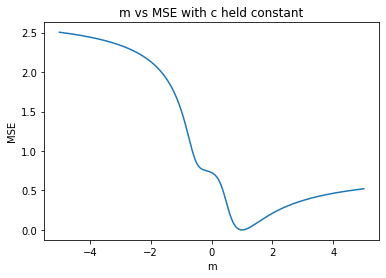

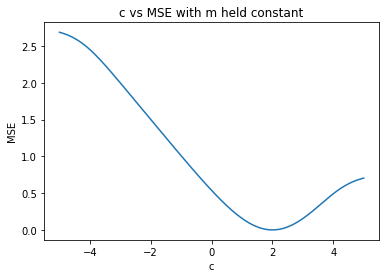

In [889]:
# Extra investigation out of scope of assignment
X = np.arange(-4,4,.01)
m = 1
c = 2
y = func3(X,m,c)[0]

ms=np.arange(-5,5.01,.01)
cs=np.arange(-5,5.01,.01)

pred_var_m=[mse(y,func3(X,m_var,c)[0]) for m_var in ms]
pred_var_c=[mse(y,func3(X,m,c_var)[0]) for c_var in cs]
pred_var_m=np.array(pred_var_m)
pred_var_c=np.array(pred_var_c)

print(pred_var_m.shape)
print(pred_var_c.shape)

plt.title('m vs MSE with c held constant')
plt.xlabel('m')
plt.ylabel('MSE')
plt.plot(ms, pred_var_m)
plt.show()

plt.title('c vs MSE with m held constant')
plt.xlabel('c')
plt.ylabel('MSE')
plt.plot(cs, pred_var_c)
plt.show()


### 3 ML Basics

#### 3.1 Write a function to compute the (multiclass) logistic loss (also called the cross- entropy loss) given the parameters (W, b) of a linear model (as numpy arrays) and an example (x, y).

In [1270]:
import pickle #To read data for this experiment

# First we import the spiral data for use in testing the function

#Read spiral data created with Data_Linear_Classifier.ipynb
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

# Initialize test parameters
np.random.seed(0)
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

def multiclass_cross_entropy(X,y,W,b, l1=1e-3, l2=1e-3):
    '''Given X, y and linear parameters W,b computes multiclass crossentropy loss
    L1 and L2 regularization hyperparameters may also be set'''
    N = X.shape[0] # number of observations
    
    # Compute linear scores based on sample X and input parameters W, b
    scores = np.dot(X,W) + b
    
    # Compute pieces of softmax function to handle multiple classes and then compute sofmax probabiliteis
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    # Compute log probabilities assigned to the correct classes for each example then average over all samples
    correct_logprobs = -np.log(probs[range(N),y])
    data_loss  = np.sum(correct_logprobs)/N           
    
    # Compute L1 and L2 regularized loss
    l1reg = .5*l1*np.sum(np.abs(W))
    l2reg = .5*l2*np.sum(np.square(W))
    reg_loss = l1reg + l2reg
    
    # Combine Data and Regularization Loss
    loss = data_loss + reg_loss
    #print('dataloss:',data_loss,' regloss:',reg_loss)
    return loss, probs

loss = multiclass_cross_entropy(X,y,W,b)
print('Answer: Loss for spiral data with parameter W initialized with random seed of 0 and b initialized with zeros:')
print('Loss =', loss[0])

Answer: Loss for spiral data with parameter W initialized with random seed of 0 and b initialized with zeros:
Loss = 1.098619894735234


This function can now be used to aid in computing multiclass crossentropy loss during a gradient descent loop.

### 4 Classification Pipeline

#### 4.1 Generate data from Data Linear Classifier.ipynb.

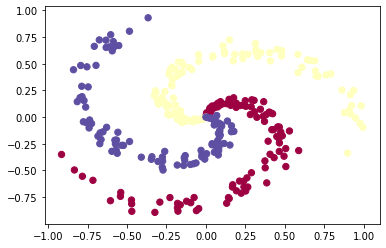

In [1271]:
import pickle #To read data for this experiment

#Read spiral data created with Data_Linear_Classifier.ipynb
X = pickle.load(open('dataX.pickle','rb'))
y = pickle.load(open('dataY.pickle','rb'))

#Define some local varaibles
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0

#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

#### 4.2 Split the data into test and train (20%:80%)

In [1272]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 4.3 Build a linear classifier assuming the multiclass logistic loss and an l2 regularization for the weights only. Report the prediction accuracy on the training data and the test data and show appropriate plots.

Several functions developed earlier are reused and updated below - see comments for more detail

In [1273]:
''' First, we'll reuse the multiclass crossentropy function from question 3
As the function uses both L1 and L2 reg on the weights, we the L1 arg to 0 to zero out that term '''
def multiclass_cross_entropy(X,y,W,b, l1=1e-3, l2=1e-3):
    '''Given X, y and linear parameters W,b computes multiclass crossentropy loss
    L1 and L2 regularization hyperparameters may also be set'''
    N = X.shape[0] # number of observations
    
    # Compute linear scores based on sample X and input parameters W, b
    scores = np.dot(X,W) + b
    
    # Compute pieces of softmax function to handle multiple classes and then compute sofmax probabiliteis
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    
    # Compute log probabilities assigned to the correct classes for each example then average over all samples
    correct_logprobs = -np.log(probs[range(N),y])
    data_loss  = np.sum(correct_logprobs)/N           
    
    # Compute L1 and L2 regularized loss
    l1reg = .5*l1*np.sum(np.abs(W))
    l2reg = .5*l2*np.sum(np.square(W))
    reg_loss = l1reg + l2reg
    
    # Combine Data and Regularization Loss
    loss = data_loss + reg_loss
    #print('dataloss:',data_loss,' regloss:',reg_loss)
    return loss ,probs

''' We'll also re work our earlier gradient_descent step function to use multiclass cross entropy instead of MSE
We'll also reuse the linear function (func1) written before and the gradient_descent_loop written before. '''

def func1(X, W, b):
    '''Returns result of linear function f(m,x,c)=m*x+c and the result of the function's partial
    derivatives w.r.t. m and c'''
    dW = X.T  #partial derivative of func1 w.r.t. m = X
    db = np.ones(len(X)) #partial derivative of func1 w.r.t. c = 1
    result = np.multiply(X,m) + c
    return result, dW ,db

def gradient_descent_step_CE(func, X, y, W, b, step_size):
    '''Completes one step of gradient descent using given function and assumes multiclass CE as loss function.'''
    reg = 1e-3
    N = X.shape[0]
    scores, dW_part, db_part = func(X,W,b)
    loss, probs = multiclass_cross_entropy(X,y,W,b, l1=0, l2=reg)
    
    
    # compute the gradient on scores, assumes multiclass crossentropy loss
    dscores = probs
    dscores[range(N),y] -= 1
    dscores /= N
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(dW_part, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    
    return loss, W, b

def gradient_descent(func, X, y, step_size=.1, steps=100):
    '''Performs gradient descent over given number of steps with given step_size (aka learning rate)'''
    # Initialize test parameters
    np.random.seed(0)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    #print('m_init',m,'c_init',c)
    losses =[]
    for i in range(steps):
        loss, W, b = gradient_descent_step_CE(func, X, y, W, b, step_size)
        losses.append(loss)
        #if i % 10 == 0: print("iteration: "+str(i) +" loss: "+str(loss)+ '\t m: '+str(m)+' c: '+str(c))
    return losses, W, b

# For post training: plot the resulting classifier
def plot_result(X, y, W, b):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    
# Evaluate model and return accuracy
def eval_test(X,y,W,b):
    scores = np.dot(X, W) + b
    predicted_class = np.argmax(scores, axis=1)
    acc = np.mean(predicted_class == y)
    return acc

#### 4.3 Build a linear classifier assuming the multiclass logistic loss and an l2 regularization for the weights only. Report the prediction accuracy on the training data and the test data and show appropriate plots.

In [1274]:
steps = 200
step_size = .1

# See above for nested functions
loss, W, b = gradient_descent(func1, XTrain, yTrain, step_size=step_size, steps=steps)
train_acc = eval_test(XTrain,yTrain,W,b)
test_acc = eval_test(XTest,yTest,W,b)

print('Answer for Train Accuracy and Test Accuracy')
print('Train Acc:', train_acc)
print('Test Acc:', test_acc)

Answer for Train Accuracy and Test Accuracy
Train Acc: 0.5416666666666666
Test Acc: 0.43333333333333335


Model Perfomance on Train Data


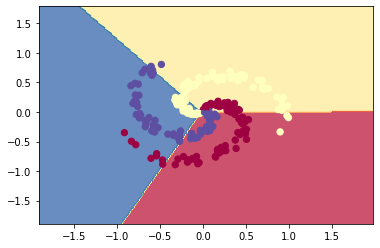

Model Perfomance on Test Data


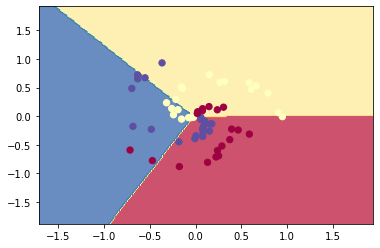

In [1275]:
print('Model Perfomance on Train Data')
plot_result(XTrain, yTrain ,W ,b)
print('Model Perfomance on Test Data')
plot_result(XTest, yTest ,W ,b)

#### 4.4 Introduce a cross validation scheme and justify your choice of parameters. What is the validation accuracy compare to the test accuracy.

In [1276]:
from sklearn.model_selection import KFold

kfold = KFold(3, True, 0)

steps = 200
step_sizes = [.1]
colors = ['r']
losses = []
accs = []
Ws = []
bs = []
for step_size in step_sizes:
    cv_loss = []
    cv_acc =[]
    cv_W = []
    cv_b = []

    for (Xtrn_idx, Xval_idx), (ytrn_idx, yval_idx)  in zip(kfold.split(XTrain),kfold.split(yTrain)):
        Xtrn = XTrain[Xtrn_idx]
        Xval = XTrain[Xval_idx]
        ytrn = yTrain[ytrn_idx]
        yval = yTrain[yval_idx]
        
        # Run model on one cv split
        loss, W, b = gradient_descent(func1, Xtrn, ytrn, step_size=step_size, steps=steps)
        acc = eval_test(Xval,yval,W,b)
        
        #Save cv results
        cv_W.append(W)
        cv_b.append(b)
        cv_loss.append(loss)
        cv_acc.append(acc)
        
        print('step_size:', step_size, 'W:',W ,'b:',b,'Loss:',loss[-1],'Acc:',acc)
        
    # Save results across parameter being optimized
    Ws.append(cv_W)
    bs.append(cv_b)
    losses.append(cv_loss)
    accs.append(cv_acc)

step_size: 0.1 W: [[ 0.55725654  0.58852483 -1.11497428]
 [-1.06465502  1.31364264 -0.21829593]] b: [[-0.01654744 -0.01987276  0.0364202 ]] Loss: 0.8399867912360125 Acc: 0.6
step_size: 0.1 W: [[ 0.59769333  0.64257936 -1.2094656 ]
 [-1.18624008  1.30747264 -0.09054088]] b: [[ 0.00941299  0.08733074 -0.09674373]] Loss: 0.8082864290045195 Acc: 0.4875
step_size: 0.1 W: [[ 0.76306832  0.63035767 -1.36261888]
 [-1.01548389  1.25658367 -0.21040809]] b: [[ 0.03871931 -0.00585215 -0.03286716]] Loss: 0.8038141542606969 Acc: 0.525


In [1277]:
# Compute mean accuracy across folds for each parameter iteration
avg_val_accs = [np.mean(acc) for acc in accs]
avg_val_accs

# Pick best cv model
index_best = np.argmax(avg_val_accs)
best_lr = step_sizes[index_best]
best_W = Ws[index_best]
best_b = bs[index_best]
print('LR:', best_lr)
print('W', best_W)
print('b:', best_b)

LR: 0.1
W [array([[ 0.55725654,  0.58852483, -1.11497428],
       [-1.06465502,  1.31364264, -0.21829593]]), array([[ 0.59769333,  0.64257936, -1.2094656 ],
       [-1.18624008,  1.30747264, -0.09054088]]), array([[ 0.76306832,  0.63035767, -1.36261888],
       [-1.01548389,  1.25658367, -0.21040809]])]
b: [array([[-0.01654744, -0.01987276,  0.0364202 ]]), array([[ 0.00941299,  0.08733074, -0.09674373]]), array([[ 0.03871931, -0.00585215, -0.03286716]])]


In [1278]:
# Eval full train and test data with cv model
best_train_acc = []
best_test_acc = []
for W, b in zip(best_W, best_b):
    best_train_acc.append(eval_test(XTrain,yTrain,W,b))
    best_test_acc.append(eval_test(XTest,yTest,W,b))
    
print('Answer for Cross Val: Train/Val Accuracy and Test Accuracy')
print('Final Train Acc:', np.mean(best_train_acc))
print('Final Test Acc:', np.mean(best_test_acc))

Answer for Cross Val: Train/Val Accuracy and Test Accuracy
Final Train Acc: 0.5513888888888888
Final Test Acc: 0.4611111111111111


#### 4.5 What is the sensitivity of the model’s performance to different learning rates and the number of gradient descent iterations. Describe via suitable plots.

First, trying 4 learn rate values: .01,.1,.5,.8

In [1279]:
kfold = KFold(3, True, 0)

steps = 200
step_sizes = [.01,.1,.5,.8]
colors = ['r','b','g','m']
losses = []
accs = []
Ws = []
bs = []
for step_size in step_sizes:
    cv_loss = []
    cv_acc =[]
    cv_W = []
    cv_b = []

    for (Xtrn_idx, Xval_idx), (ytrn_idx, yval_idx)  in zip(kfold.split(XTrain),kfold.split(yTrain)):
        Xtrn = XTrain[Xtrn_idx]
        Xval = XTrain[Xval_idx]
        ytrn = yTrain[ytrn_idx]
        yval = yTrain[yval_idx]
        
        # Run model on one cv split
        loss, W, b = gradient_descent(func1, Xtrn, ytrn, step_size=step_size, steps=steps)
        acc = eval_test(Xval,yval,W,b)
        
        #Save cv results
        cv_W.append(W)
        cv_b.append(b)
        cv_loss.append(loss)
        cv_acc.append(acc)
        
        print('step_size:', step_size, 'W:',W ,'b:',b,'Loss:',loss[-1],'Acc:',acc)
        
    # Save results across parameter being optimized
    Ws.append(cv_W)
    bs.append(cv_b)
    losses.append(cv_loss)
    accs.append(cv_acc)
    
# Compute mean accuracy across folds for each parameter iteration
avg_val_accs = [np.mean(acc) for acc in accs]
avg_val_accs

# Pick best cv model
index_best = np.argmax(avg_val_accs)
best_lr = step_sizes[index_best]
best_W = Ws[index_best]
best_b = bs[index_best]
print('LR:', best_lr)
print('W', best_W)
print('b:', best_b)

# Eval full train and test data with cv model
best_train_acc = []
best_test_acc = []
for W, b in zip(best_W, best_b):
    best_train_acc.append(eval_test(XTrain,yTrain,W,b))
    best_test_acc.append(eval_test(XTest,yTest,W,b))

print()
print('Answer for Cross Val: Train/Val Accuracy and Test Accuracy')
print('Best Learn Rate:',best_lr)
print('Final Train Acc:', np.mean(best_train_acc))
print('Final Test Acc:', np.mean(best_test_acc))

step_size: 0.01 W: [[ 0.09307214  0.10500947 -0.16671493]
 [-0.13238192  0.21031402 -0.04668293]] b: [[-0.02049964 -0.01042811  0.03092775]] Loss: 1.0431921942693407 Acc: 0.6375
step_size: 0.01 W: [[ 0.10148413  0.11202506 -0.18214251]
 [-0.15578088  0.20991301 -0.02288296]] b: [[ 0.01386566  0.02664117 -0.04050683]] Loss: 1.035634958457541 Acc: 0.5125
step_size: 0.01 W: [[ 0.12807169  0.10516526 -0.20187027]
 [-0.13112537  0.20349468 -0.04112013]] b: [[ 0.00676131 -0.01084567  0.00408435]] Loss: 1.0354292225086905 Acc: 0.5
step_size: 0.1 W: [[ 0.55725654  0.58852483 -1.11497428]
 [-1.06465502  1.31364264 -0.21829593]] b: [[-0.01654744 -0.01987276  0.0364202 ]] Loss: 0.8399867912360125 Acc: 0.6
step_size: 0.1 W: [[ 0.59769333  0.64257936 -1.2094656 ]
 [-1.18624008  1.30747264 -0.09054088]] b: [[ 0.00941299  0.08733074 -0.09674373]] Loss: 0.8082864290045195 Acc: 0.4875
step_size: 0.1 W: [[ 0.76306832  0.63035767 -1.36261888]
 [-1.01548389  1.25658367 -0.21040809]] b: [[ 0.03871931 -0.00

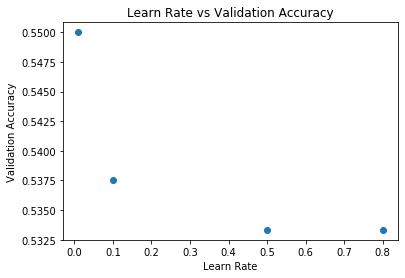

In [1280]:
# Plot results of learn rate experiment
plt.title('Learn Rate vs Validation Accuracy')
plt.xlabel('Learn Rate')
plt.ylabel('Validation Accuracy')
plt.plot(step_sizes, avg_val_accs, 'o')

Above we see that validation accuracy peaks at a learn rate 0.1 and reduces as the learn rate increases.

Investigate 4 different step ranges, using best learn rate from before

In [1282]:
kfold = KFold(3, True, 0)

steps_list = [100,200,500,1000,5000]
step_sizes = [.01]
colors = ['r','b','g','m']
losses = []
accs = []
Ws = []
bs = []
for step_size in step_sizes:
    for steps in steps_list:
        cv_loss = []
        cv_acc =[]
        cv_W = []
        cv_b = []

        for (Xtrn_idx, Xval_idx), (ytrn_idx, yval_idx)  in zip(kfold.split(XTrain),kfold.split(yTrain)):
            Xtrn = XTrain[Xtrn_idx]
            Xval = XTrain[Xval_idx]
            ytrn = yTrain[ytrn_idx]
            yval = yTrain[yval_idx]

            # Run model on one cv split
            loss, W, b = gradient_descent(func1, Xtrn, ytrn, step_size=step_size, steps=steps)
            acc = eval_test(Xval,yval,W,b)

            #Save cv results
            cv_W.append(W)
            cv_b.append(b)
            cv_loss.append(loss)
            cv_acc.append(acc)

            print('step_size:', step_size, 'W:',W ,'b:',b,'Loss:',loss[-1],'Acc:',acc)

        # Save results across parameter being optimized
        Ws.append(cv_W)
        bs.append(cv_b)
        losses.append(cv_loss)
        accs.append(cv_acc)
    
# Compute mean accuracy across folds for each parameter iteration
avg_val_accs = [np.mean(acc) for acc in accs]
print('Avg Val Acc',avg_val_accs)

# Pick best cv model
index_best = np.argmax(avg_val_accs)
#best_lr = step_sizes[index_best]
best_W = Ws[index_best]
best_b = bs[index_best]
best_steps = steps_list[index_best]
print('LR:', best_lr)
print('W', best_W)
print('b:', best_b)

# Eval full train and test data with cv model
best_train_acc = []
best_test_acc = []
for W, b in zip(best_W, best_b):
    best_train_acc.append(eval_test(XTrain,yTrain,W,b))
    best_test_acc.append(eval_test(XTest,yTest,W,b))

print()
print('Answer for Cross Val: Train/Val Accuracy and Test Accuracy')
print('Best Learn Rate:',step_sizes[0])
print('Best Gradient Steps:',best_steps)
print('Final Train Acc:', np.mean(best_train_acc))
print('Final Test Acc:', np.mean(best_test_acc))

step_size: 0.01 W: [[ 0.05625687  0.05637098 -0.08122979]
 [-0.05679848  0.11715544 -0.02907652]] b: [[-0.01214471 -0.00659853  0.01874324]] Loss: 1.0691896515014105 Acc: 0.6375
step_size: 0.01 W: [[ 0.06064033  0.0599643  -0.08920656]
 [-0.06896727  0.1168183  -0.0165706 ]] b: [[ 0.00854085  0.01489008 -0.02343093]] Loss: 1.0653903332367303 Acc: 0.5125
step_size: 0.01 W: [[ 0.07437391  0.05625801 -0.09923386]
 [-0.05638459  0.1136917  -0.02602667]] b: [[ 0.00376912 -0.00671909  0.00294998]] Loss: 1.0651792688409918 Acc: 0.4875
step_size: 0.01 W: [[ 0.09307214  0.10500947 -0.16671493]
 [-0.13238192  0.21031402 -0.04668293]] b: [[-0.02049964 -0.01042811  0.03092775]] Loss: 1.0431921942693407 Acc: 0.6375
step_size: 0.01 W: [[ 0.10148413  0.11202506 -0.18214251]
 [-0.15578088  0.20991301 -0.02288296]] b: [[ 0.01386566  0.02664117 -0.04050683]] Loss: 1.035634958457541 Acc: 0.5125
step_size: 0.01 W: [[ 0.12807169  0.10516526 -0.20187027]
 [-0.13112537  0.20349468 -0.04112013]] b: [[ 0.00676

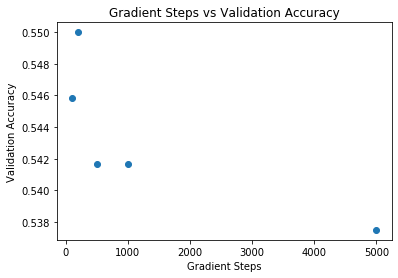

In [1283]:
# Plot results of gradient steps experiment
plt.title('Gradient Steps vs Validation Accuracy')
plt.xlabel('Gradient Steps')
plt.ylabel('Validation Accuracy')
plt.plot(steps_list, avg_val_accs, 'o')

Above we see that validation accuracy is the same for gradient steps of 100 and 200 (picking 100 as best due to reduced compute time), with no clear pattern for the other values except that they performed worse.

#### 4.6 What is the sensitivity of the model’s performance to different regularization pa- rameter values. Find the best regularization parameter using an exhaustive search procedure. Describe your choice via suitable plots. What is the performance differ- ence between using regularization and no regularization?

In [1284]:
# To incorporate regularization search the base gradient descent functions need to be updated
# with reg value as an arg. To avoid breaking all other earlier function calls, the functions are redefined here
# 
def gradient_descent_step_CE(func, X, y, W, b, step_size, reg):
    '''Completes one step of gradient descent using given function and assumes multiclass CE as loss function.'''
    N = X.shape[0]
    scores, dW_part, db_part = func(X,W,b)
    loss, probs = multiclass_cross_entropy(X,y,W,b, l1=0, l2=reg)
    
    
    # compute the gradient on scores, assumes multiclass crossentropy loss
    dscores = probs
    dscores[range(N),y] -= 1
    dscores /= N
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(dW_part, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    
    return loss, W, b

def gradient_descent(func, X, y, step_size=.1, steps=100, reg = 1e-3):
    '''Performs gradient descent over given number of steps with given step_size (aka learning rate)'''
    # Initialize test parameters
    np.random.seed(0)
    W = 0.01 * np.random.randn(D,K)
    b = np.zeros((1,K))
    #print('m_init',m,'c_init',c)
    losses =[]
    for i in range(steps):
        loss, W, b = gradient_descent_step_CE(func, X, y, W, b, step_size, reg)
        losses.append(loss)
        #if i % 10 == 0: print("iteration: "+str(i) +" loss: "+str(loss)+ '\t m: '+str(m)+' c: '+str(c))
    return losses, W, b

In [1285]:
kfold = KFold(3, True, 0)

steps_list = [200]
step_sizes = [.01]
reg_list = [0,.0001,.0005,.001,.005,.01,.05,.1,.5]
colors = ['r','b','g','m']
losses = []
accs = []
Ws = []
bs = []
for step_size in step_sizes:
    for steps in steps_list:
        for reg in reg_list:
            cv_loss = []
            cv_acc =[]
            cv_W = []
            cv_b = []

            for (Xtrn_idx, Xval_idx), (ytrn_idx, yval_idx)  in zip(kfold.split(XTrain),kfold.split(yTrain)):
                Xtrn = XTrain[Xtrn_idx]
                Xval = XTrain[Xval_idx]
                ytrn = yTrain[ytrn_idx]
                yval = yTrain[yval_idx]

                # Run model on one cv split
                loss, W, b = gradient_descent(func1, Xtrn, ytrn, step_size=step_size, steps=steps, reg=reg)
                acc = eval_test(Xval,yval,W,b)

                #Save cv results
                cv_W.append(W)
                cv_b.append(b)
                cv_loss.append(loss)
                cv_acc.append(acc)

                print('step_size:', step_size, 'W:',W ,'b:',b,'Loss:',loss[-1],'Acc:',acc)

            # Save results across parameter being optimized
            Ws.append(cv_W)
            bs.append(cv_b)
            losses.append(cv_loss)
            accs.append(cv_acc)
    
# Compute mean accuracy across folds for each parameter iteration
avg_val_accs = [np.mean(acc) for acc in accs]
print('Avg Val Acc',avg_val_accs)

# Pick best cv model
index_best = np.argmax(avg_val_accs)
best_W = Ws[index_best]
best_b = bs[index_best]
best_reg = reg_list[index_best]
print('LR:', best_lr)
print('W', best_W)
print('b:', best_b)

# Eval full train and test data with cv model
best_train_acc = []
best_test_acc = []
for W, b in zip(best_W, best_b):
    best_train_acc.append(eval_test(XTrain,yTrain,W,b))
    best_test_acc.append(eval_test(XTest,yTest,W,b))

print()
print('Answer for Cross Val: Train/Val Accuracy and Test Accuracy')
print('Best Learn Rate:',step_sizes[0])
print('Best Gradient Steps:',steps_list[0])
print('Best L2 Regularization Value',best_reg)
print('Final Train Acc:', np.mean(best_train_acc))
print('Final Test Acc:', np.mean(best_test_acc))

step_size: 0.01 W: [[ 0.09318065  0.10511635 -0.16686752]
 [-0.13249013  0.21053808 -0.04673622]] b: [[-0.02049877 -0.01042719  0.03092595]] Loss: 1.043086642690766 Acc: 0.6375
step_size: 0.01 W: [[ 0.10160047  0.11213881 -0.18230981]
 [-0.15591194  0.21013665 -0.02291297]] b: [[ 0.01386497  0.02664265 -0.04050762]] Loss: 1.0355165345969493 Acc: 0.5125
step_size: 0.01 W: [[ 0.12821408  0.10527258 -0.20205719]
 [-0.13123218  0.20371193 -0.04116802]] b: [[ 0.00676203 -0.01084484  0.00408281]] Loss: 1.035307406818482 Acc: 0.5
step_size: 0.01 W: [[ 0.09316979  0.10510565 -0.16685225]
 [-0.1324793   0.21051566 -0.04673089]] b: [[-0.02049885 -0.01042728  0.03092613]] Loss: 1.0430972103749423 Acc: 0.6375
step_size: 0.01 W: [[ 0.10158883  0.11212743 -0.18229307]
 [-0.15589883  0.21011427 -0.02290997]] b: [[ 0.01386504  0.0266425  -0.04050754]] Loss: 1.0355283909165849 Acc: 0.5125
step_size: 0.01 W: [[ 0.12819983  0.10526185 -0.20203849]
 [-0.13122149  0.20369019 -0.04116323]] b: [[ 0.00676196 

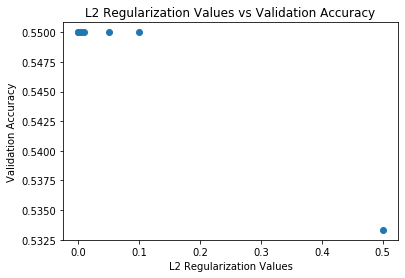

In [1286]:
# Plot results of gradient steps experiment
plt.title('L2 Regularization Values vs Validation Accuracy')
plt.xlabel('L2 Regularization Values')
plt.ylabel('Validation Accuracy')
plt.plot(reg_list, avg_val_accs, 'o')

#### 4.7 What is the sensitivity of the model’s performance with respect to a different test train split (e.g., 50%:50%).

In [1287]:
# Make new 50/50 split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.5, random_state = 0)

kfold = KFold(3, True, 0)

#Use best values from earlier
steps_list = [100]
step_sizes = [.1]
reg_list = [.1]
colors = ['r','b','g','m']
losses = []
accs = []
Ws = []
bs = []
for step_size in step_sizes:
    for steps in steps_list:
        for reg in reg_list:
            cv_loss = []
            cv_acc =[]
            cv_W = []
            cv_b = []

            for (Xtrn_idx, Xval_idx), (ytrn_idx, yval_idx)  in zip(kfold.split(XTrain),kfold.split(yTrain)):
                Xtrn = XTrain[Xtrn_idx]
                Xval = XTrain[Xval_idx]
                ytrn = yTrain[ytrn_idx]
                yval = yTrain[yval_idx]

                # Run model on one cv split
                loss, W, b = gradient_descent(func1, Xtrn, ytrn, step_size=step_size, steps=steps, reg=reg)
                acc = eval_test(Xval,yval,W,b)

                #Save cv results
                cv_W.append(W)
                cv_b.append(b)
                cv_loss.append(loss)
                cv_acc.append(acc)

                print('step_size:', step_size, 'W:',W ,'b:',b,'Loss:',loss[-1],'Acc:',acc)

            # Save results across parameter being optimized
            Ws.append(cv_W)
            bs.append(cv_b)
            losses.append(cv_loss)
            accs.append(cv_acc)
    
# Compute mean accuracy across folds for each parameter iteration
avg_val_accs = [np.mean(acc) for acc in accs]
print('Avg Val Acc',avg_val_accs)

# Pick best cv model
index_best = np.argmax(avg_val_accs)
best_W = Ws[index_best]
best_b = bs[index_best]
best_reg = reg_list[index_best]
print('LR:', best_lr)
print('W', best_W)
print('b:', best_b)

# Eval full train and test data with cv model
best_train_acc = []
best_test_acc = []
for W, b in zip(best_W, best_b):
    best_train_acc.append(eval_test(XTrain,yTrain,W,b))
    best_test_acc.append(eval_test(XTest,yTest,W,b))

print()
print('Answer for Cross Val: Train/Val Accuracy and Test Accuracy')
print('Best Learn Rate:',step_sizes[0])
print('Best Gradient Steps:',steps_list[0])
print('Best L2 Regularization Value',reg_list[0])
print('Final Train Acc:', np.mean(best_train_acc))
print('Final Test Acc:', np.mean(best_test_acc))

step_size: 0.1 W: [[ 0.26045247  0.32235972 -0.57130799]
 [-0.50029305  0.54588048 -0.03412632]] b: [[ 0.03802861  0.0676498  -0.10567842]] Loss: 0.9704664740752124 Acc: 0.52
step_size: 0.1 W: [[ 0.22772072  0.20762133 -0.42383784]
 [-0.45215348  0.48165055 -0.01803596]] b: [[-0.07730567  0.02067819  0.05662748]] Loss: 1.013444423999749 Acc: 0.62
step_size: 0.1 W: [[ 0.18319139  0.35904865 -0.53073583]
 [-0.439613    0.5114285  -0.06035439]] b: [[ 0.06992906 -0.02958969 -0.04033938]] Loss: 0.9893787285777109 Acc: 0.54
Avg Val Acc [0.56]
LR: 0.01
W [array([[ 0.26045247,  0.32235972, -0.57130799],
       [-0.50029305,  0.54588048, -0.03412632]]), array([[ 0.22772072,  0.20762133, -0.42383784],
       [-0.45215348,  0.48165055, -0.01803596]]), array([[ 0.18319139,  0.35904865, -0.53073583],
       [-0.439613  ,  0.5114285 , -0.06035439]])]
b: [array([[ 0.03802861,  0.0676498 , -0.10567842]]), array([[-0.07730567,  0.02067819,  0.05662748]]), array([[ 0.06992906, -0.02958969, -0.04033938]]

50/50 Model Perfomance on Train Data


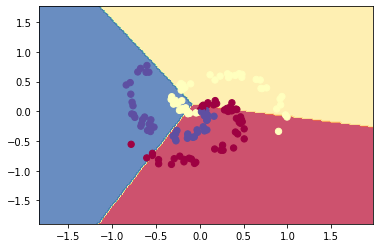

50/50 Model Perfomance on Test Data


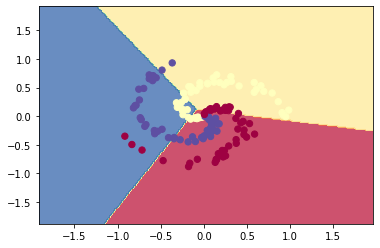

In [1288]:
print('50/50 Model Perfomance on Train Data')
plot_result(XTrain, yTrain ,W ,b)
print('50/50 Model Perfomance on Test Data')
plot_result(XTest, yTest ,W ,b)

Compared to 80/20 split, the 50/50 split yielded similar test accuracy. This is might be due to random chance that the three classes just happen to be in the model predicted area slightly more than before.

### 5 Feedforward Neural Networks

#### Text answer

In [195]:
# code
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [196]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [198]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [200]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

In [202]:
train_images = train_images / 255.0

test_images = test_images / 255.0

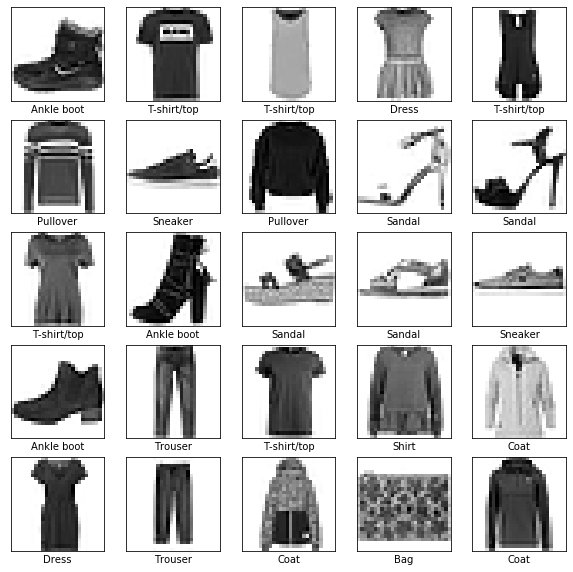

In [203]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# random check with nine training examples
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
    plt.tight_layout()

In [204]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [205]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [206]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4981 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3750 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3347 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3137 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2964 - acc: 0.8900


In [207]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/sample - loss: 0.3542 - acc: 0.8703
Test accuracy: 0.8703


In [208]:
predictions = model.predict(test_images)

In [209]:
predictions[0]

array([8.6070463e-07, 1.4797305e-07, 4.3543306e-08, 7.4709988e-08,
       7.6106105e-08, 3.2596305e-02, 1.6844709e-06, 1.5047391e-02,
       2.5326194e-06, 9.5235091e-01], dtype=float32)

In [210]:
np.argmax(predictions[0])

9

In [211]:
test_labels[0]

9

In [212]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

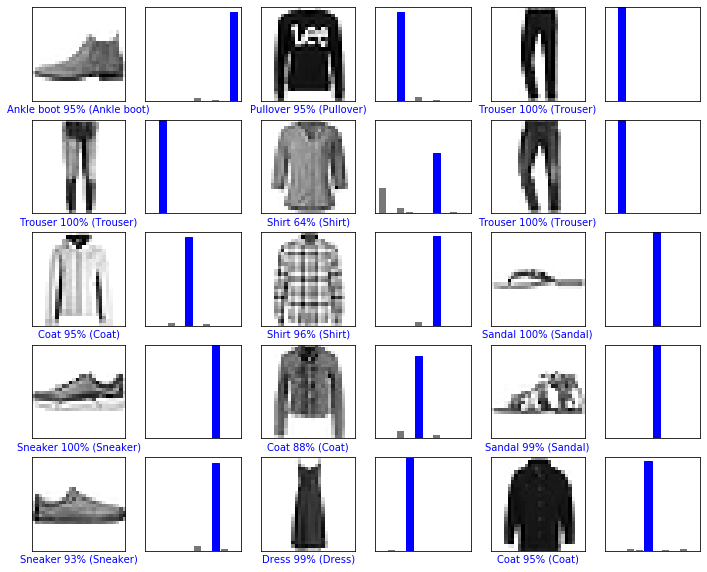

In [215]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [216]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [217]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [218]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.6070463e-07 1.4797277e-07 4.3543221e-08 7.4709988e-08 7.6105955e-08
  3.2596286e-02 1.6844709e-06 1.5047385e-02 2.5326217e-06 9.5235091e-01]]


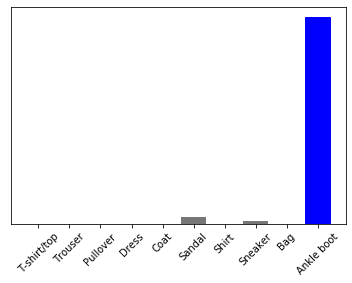

In [219]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [220]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


In [1172]:
# now trying model1 with different optimizer than adam
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1173]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.7344 - acc: 0.7621
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.5130 - acc: 0.8261
Epoch 3/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4739 - acc: 0.8377
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4518 - acc: 0.8440
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4360 - acc: 0.8503


In [1174]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.4750 - acc: 0.8353
Test accuracy: 0.8353


In [1175]:
predictions = model.predict(test_images)

In [1176]:
predictions[0]

array([1.6367276e-05, 1.8147313e-06, 2.4501398e-05, 3.1031679e-05,
       2.9854204e-05, 6.3441940e-02, 4.4819506e-05, 1.5420996e-01,
       4.1792630e-03, 7.7802044e-01], dtype=float32)

We can see if we use a different optimizerin this case SGD then accuracy reduces for model 1

In [1177]:
# now trying model1 with different optimizer here 
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1178]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4820 - acc: 0.8316
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.4091 - acc: 0.8550
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3806 - acc: 0.8649
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3599 - acc: 0.8709
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3480 - acc: 0.8748


In [1179]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3814 - acc: 0.8679
Test accuracy: 0.8679


In [1181]:
predictions = model.predict(test_images)

In [1182]:
predictions[0]

array([3.7883568e-05, 9.9637624e-08, 3.2176707e-05, 2.5447947e-05,
       4.2471471e-05, 3.4370586e-02, 2.8741019e-04, 8.4802516e-02,
       3.6498774e-03, 8.7675154e-01], dtype=float32)

so for model 1 with 2 layers best optimizer is adam with accuracy of approx 87.03%

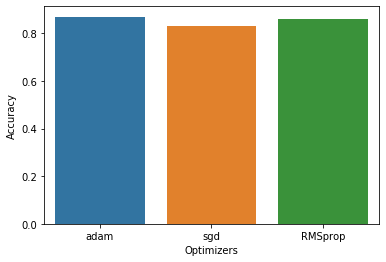

In [1183]:
y = [.87, .83,.86]
x = ["adam", "sgd","RMSprop"]
sns.barplot(x, y)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.show()

In [1166]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1167]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1168]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5107 - acc: 0.8192
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3973 - acc: 0.8579
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3650 - acc: 0.8680
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3468 - acc: 0.8744
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3354 - acc: 0.8779


In [1169]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.3821 - acc: 0.8631
Test accuracy: 0.8631


In [1170]:
predictions = model2.predict(test_images)

In [1171]:
predictions[0]

array([2.3796699e-06, 7.6565412e-09, 9.7671473e-06, 2.0184696e-06,
       2.3240352e-06, 3.5098832e-02, 5.2818985e-05, 1.3584955e-01,
       1.5354183e-04, 8.2882875e-01], dtype=float32)

As we can see the model accuracy reduces when we are using Leaky Relu

In [1184]:
#model 2 with different optimizer
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1185]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2835 - acc: 0.8966
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2784 - acc: 0.8979
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.2756 - acc: 0.8994
Epoch 4/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2736 - acc: 0.8998
Epoch 5/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2721 - acc: 0.9005


In [1186]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3419 - acc: 0.8775
Test accuracy: 0.8775


In [1187]:
predictions = model2.predict(test_images)

In [1189]:
predictions[0]

array([5.6632547e-07, 2.4831530e-09, 1.2135155e-06, 8.9331263e-07,
       3.5503004e-07, 1.0198650e-02, 5.1022667e-05, 1.0576022e-02,
       2.0250136e-05, 9.7915113e-01], dtype=float32)

In [1190]:
#model2 with different optimizer here RMSprop
model2.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1191]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3241 - acc: 0.8826
Epoch 2/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3169 - acc: 0.8853
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3104 - acc: 0.8871
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3059 - acc: 0.8898
Epoch 5/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2993 - acc: 0.8924


In [1192]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3963 - acc: 0.8606
Test accuracy: 0.8606


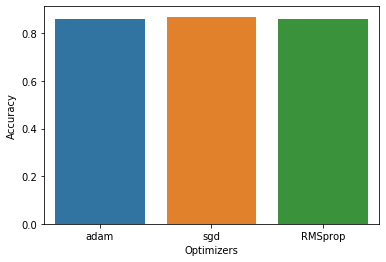

In [1193]:
#for model2 best optimizer is SGD
y = [.86, .87,.86]
x = ["adam", "sgd","RMSprop"]
sns.barplot(x, y)
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")
plt.show()

In [1219]:
#effect of different hidden layers on different models w.r.t best optimizer of given model (here model1)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [1220]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1221]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.7995 - acc: 0.7295
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5231 - acc: 0.8239
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4832 - acc: 0.8348
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4649 - acc: 0.8388
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4518 - acc: 0.8429


In [1222]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.4972 - acc: 0.8262
Test accuracy: 0.8262


In [1228]:
#effect of different hidden layers on different models w.r.t best optimizer of given model (here model1)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1232]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1233]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2707 - acc: 0.8987
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2574 - acc: 0.9045
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2445 - acc: 0.9096
Epoch 4/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2377 - acc: 0.9114
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2286 - acc: 0.9144


In [1234]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3351 - acc: 0.8845
Test accuracy: 0.8845


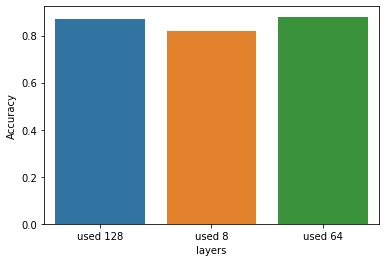

In [1235]:
# model1 accuracy with different hidden layers
y = [.87, .82,.88]
x = ["used 128", "used 8","used 64"]
sns.barplot(x, y)
plt.xlabel("layers")
plt.ylabel("Accuracy")
plt.show()

For this data set we hadn't found any significant improvement or decrement in accurancy by reducing or increasing number of hidden layers. Generally with too many hiddedn layers there is a chance of overfitting and with very less there is a chance of underfitting.

In [1236]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.3)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1237]:
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1238]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.7874 - acc: 0.7445
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5362 - acc: 0.8160
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4919 - acc: 0.8296
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4679 - acc: 0.8376
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4531 - acc: 0.8420


In [1239]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.4707 - acc: 0.8341
Test accuracy: 0.8341


In [1240]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=keras.layers.LeakyReLU(alpha=0.3)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1241]:
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1242]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.7272 - acc: 0.7595
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5107 - acc: 0.8253
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4682 - acc: 0.8388
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4446 - acc: 0.8465
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4289 - acc: 0.8513


In [1243]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.4577 - acc: 0.8402
Test accuracy: 0.8402


In [1244]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation=keras.layers.LeakyReLU(alpha=0.3)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1245]:
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1246]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.9324 - acc: 0.6816
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5807 - acc: 0.8005
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.5214 - acc: 0.8203
Epoch 4/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4938 - acc: 0.8287
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4766 - acc: 0.8349


In [1247]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4929 - acc: 0.8275
Test accuracy: 0.8275


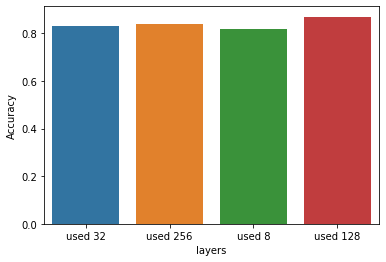

In [1248]:
# model2 accuracy with different hidden layers
y = [.83, .84,.82,.87]
x = ["used 32", "used 256","used 8", "used 128"]
sns.barplot(x, y)
plt.xlabel("layers")
plt.ylabel("Accuracy")
plt.show()

For this data set for model2 also we hadn't found any significant improvement or decrement in accurancy by reducing or increasing number of hidden layers. Generally with too many hiddedn layers there is a chance of overfitting and with very less there is a chance of underfitting.